# Hello Guys! 
* Hope you are doing well. This is my notebook where I have worked on predicting insurance cost based on the features provided in the data set
* I wanted to test the dataset with different regression models
* I have also done feature engineering initially and then exploratory analysis to build an understanding of the relationship between variables.
* Hope you Enjoy!

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [29]:
df = pd.read_csv('../data/insurance.csv')

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning and Feature Engineering 

* We will be keeping the categorical columns for now because we want to perform exploratory analysis on them
* Will drop them before applying predictive models

# Predictive Analysis

In [31]:
X=df.drop('charges', axis=1)
y=df['charges']

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300)
rfr.fit(scaled_x_train, y_train)
predict = rfr.predict(scaled_x_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predict)


2813.456785616816

In [37]:
np.sqrt(mean_squared_error(y_test, predict))

5134.317369255791

# Multiple Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(scaled_x_train, y_train)
predict2 = lr.predict(scaled_x_test)

In [39]:
mean_absolute_error(y_test, predict2)

4181.23131990926

In [40]:
np.sqrt(mean_squared_error(y_test, predict2))

6271.744361936974

# Support Vector Regressor

In [41]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)
predict3 = regressor.predict(scaled_x_test)

In [42]:
mean_absolute_error(y_test, predict3)

8198.741773266749

In [43]:
np.sqrt(mean_squared_error(y_test, predict3))

12086.621495589532

# Comparing all three models!

Text(0.5, 0, 'Predict')

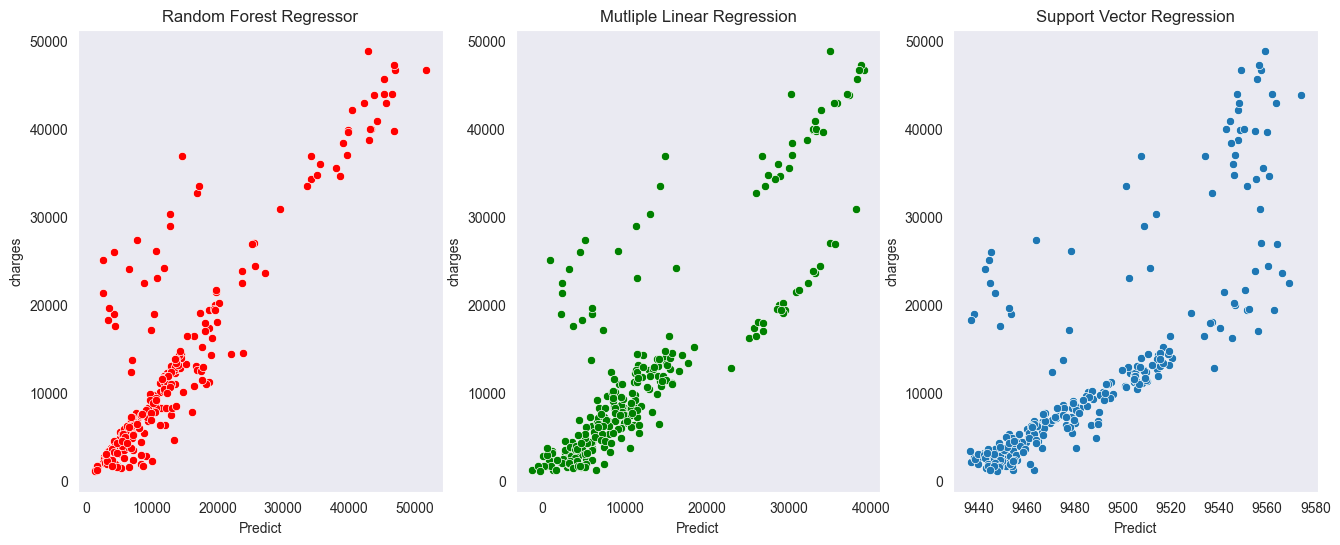

In [44]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
sns.set_style('dark')
g = sns.scatterplot(x=predict,y=y_test, ax=ax[0], color='red')
g.set_title('Random Forest Regressor')
g.set_xlabel('Predict')

sns.set_style('dark')
h = sns.scatterplot(x=predict2,y=y_test, ax=ax[1], color='green')
h.set_title('Mutliple Linear Regression')
h.set_xlabel('Predict')


sns.set_style('dark')
f = sns.scatterplot(x=predict3,y=y_test, ax=ax[2])
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')



* The data is just 1400 rows so it that is why the predicted values are drifted. 
* However the best results achieved from the data set were from Random Forest Regressor 

# Please Upvote if you like it! Reach me out to work on projects together! 
# Thank You!

Randomly Conducted Test

In [45]:
entry_1 = df[:][257:477].drop('charges', axis=1)
pred = rfr.predict(entry_1)
np.sqrt(mean_squared_error(df[:][257:477]['charges'], pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'female'

In [ ]:
entry_1 = df[:][257:477].drop('charges', axis=1)
pred = lr.predict(entry_1)
np.sqrt(mean_squared_error(df[:][257:477]['charges'], pred))

216645.99064480496

In [ ]:
entry_1 = df[:][257:477].drop('charges', axis=1)
pred = regressor.predict(entry_1)
np.sqrt(mean_squared_error(df[:][257:477]['charges'], pred))

12279.151830308625